In [23]:
##Sales Data Analysis 

In [24]:
#Loading Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import os

In [26]:
# Suppress specific future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
#Load Data
data = pd.read_csv("sales_data_sample.csv",encoding='Latin-1')
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [28]:
start_date = data['ORDERDATE'].min()
end_date = data['ORDERDATE'].max()

print("The sales data provided spans from \033[1mJanuary 6, 2003\033[0m to \033[1mMay 31, 2005\033[0m.")

The sales data provided spans from January 6, 2003 to May 31, 2005.


In [29]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [30]:
data.columns.str.strip()

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [31]:
## Changing dtype 

data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data['SALES'] = pd.to_numeric(data['SALES'])
data['QUANTITYORDERED'] = pd.to_numeric(data['QUANTITYORDERED'])

In [32]:
data.drop_duplicates()  ## Dropping Duplicates

## Dropping unnecessary columns
data.drop(columns = ['ORDERLINENUMBER','PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'STATE','POSTALCODE',
      'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME','YEAR_ID'],inplace = True)  ## Dropping unnecessary columns

## Creating new column
data['YEAR_ID'] = data['ORDERDATE'].dt.year
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,YEAR_ID
0,10107,30,95.70,2871.00,2003-02-24,Shipped,1,2,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small,2003
1,10121,34,81.35,2765.90,2003-05-07,Shipped,2,5,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small,2003
2,10134,41,94.74,3884.34,2003-07-01,Shipped,3,7,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium,2003
3,10145,45,83.26,3746.70,2003-08-25,Shipped,3,8,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium,2003
4,10159,49,100.00,5205.27,2003-10-10,Shipped,4,10,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Medium,2003


In [33]:
## Checking NULL values
data.isna().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
CITY               0
COUNTRY            0
DEALSIZE           0
YEAR_ID            0
dtype: int64

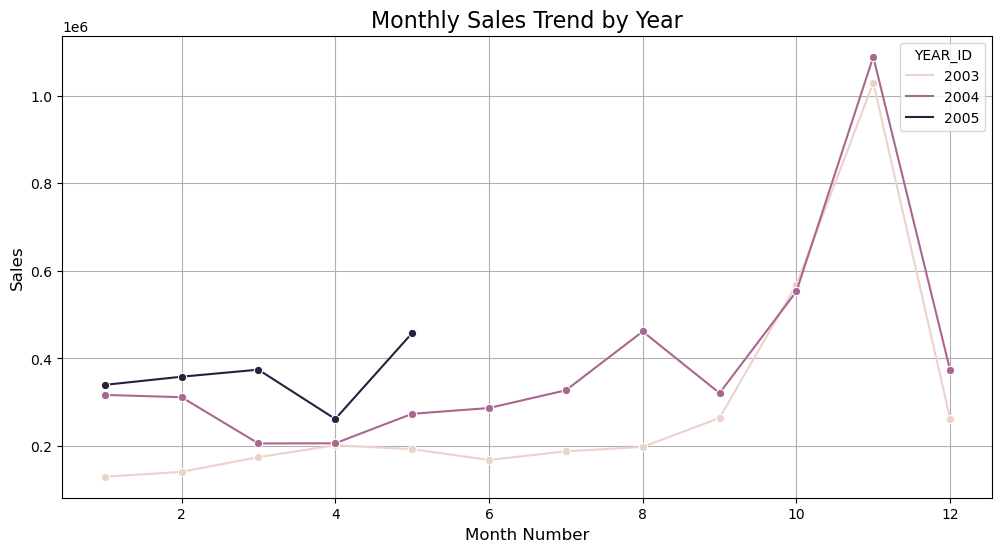

In [34]:
#Data Visualisation
#Q1. What are the overall sales trend?

## We analyzed monthly sales by aggregating the total sales for each month and visualized the trend using a line plot.
## Aggregate the monthly sales trend
monthly_sales_trend = data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()

##Plot 
plt.figure(figsize=(12,6))
sns.lineplot(monthly_sales_trend, x= 'MONTH_ID', y ='SALES', hue = 'YEAR_ID', marker = 'o')

## Add titles and labels
plt.title('Monthly Sales Trend by Year',fontsize= 16)
plt.xlabel("Month Number",fontsize= 12)
plt.ylabel("Sales",fontsize= 12)

plt.grid()
plt.show()

In [35]:
#Steady Growth: Monthly sales display consistent upward trend from January to December with a peak in December.
#Seasonal Spike: December demonstrates significantly higher sales.
#Year-on-Year Increase: Sales in 2004 and 2005 outperform 2003 sales.

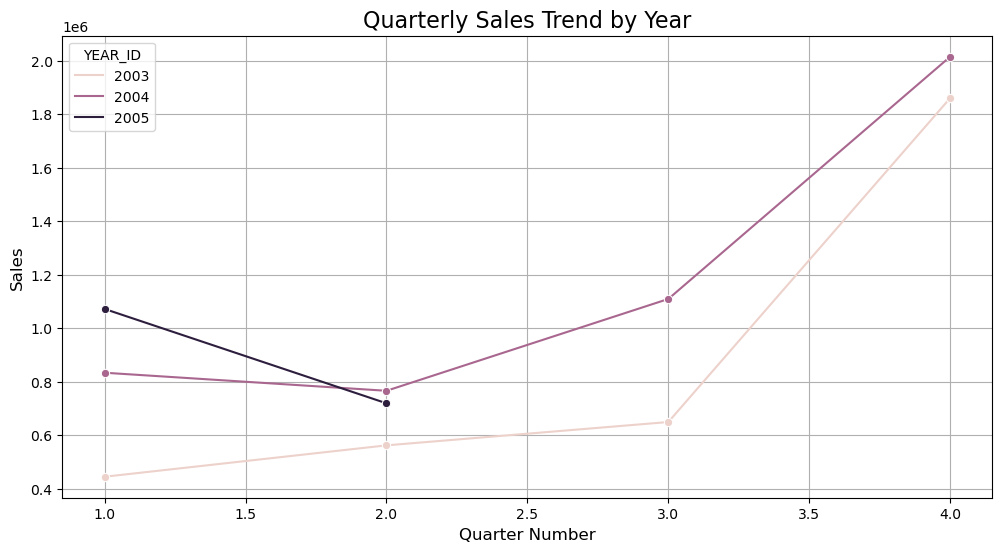

In [36]:
## Aggregate the quarterly sales trend  by grouping
quarterly_sales_trend = data.groupby(['YEAR_ID','QTR_ID'])['SALES'].sum().reset_index()

##Plot 
plt.figure(figsize=(12,6))
sns.lineplot(quarterly_sales_trend, x= 'QTR_ID', y ='SALES', hue = 'YEAR_ID', marker = 'o')

## Add titles and Labels
plt.title('Quarterly Sales Trend by Year',fontsize= 16)
plt.xlabel("Quarter Number",fontsize= 12)
plt.ylabel("Sales",fontsize= 12)

# Show
plt.grid()
plt.show()

In [37]:
#Strong Q4 Performance: Sales significantly increase in the fourth quarter across all years.
#2005 Outperms Prior Years: The sales trend for 2005 is consistently higher than 2003 and 2004

In [38]:
#Q2 which product lines generate the most revenue.

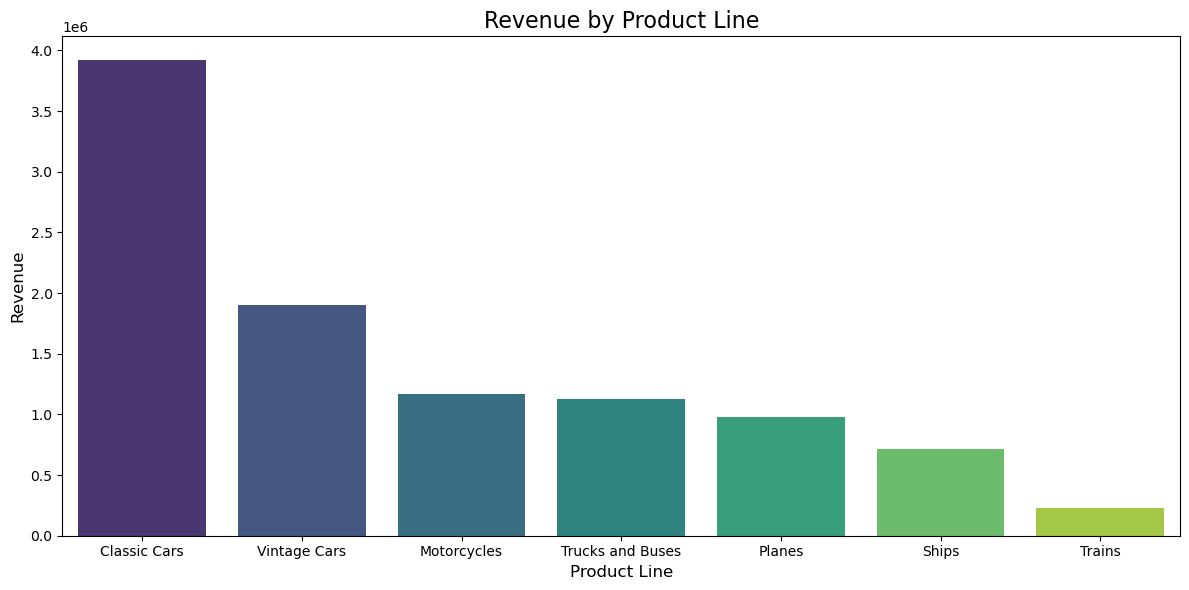

In [39]:
## We grouped the data by `PRODUCTLINE` and calculated total revenue for each product line.
product_line_revenue = data.groupby('PRODUCTLINE')['SALES'].sum().reset_index().sort_values(by ="SALES",ascending = False)

## Plot
plt.figure(figsize = (12,6))
sns.barplot(data = product_line_revenue, x = 'PRODUCTLINE', y = 'SALES', palette='viridis')

## Add titles and labels
plt.title('Revenue by Product Line', fontsize =16)
plt.xlabel('Product Line', fontsize = 12)
plt.ylabel('Revenue', fontsize =12)

plt.tight_layout()
plt.show()

In [43]:
## pivot table to get total sales by product line
sales = pd.pivot_table(data,index= 'PRODUCTLINE', values = 'SALES',aggfunc ='sum')

## total sales
total_sales = data['SALES'].sum()

## percentage of total sales for each product line
sales["% of Total Sales"] = (sales['SALES'] / total_sales) * 100

sales.sort_values(by = '% of Total Sales', ascending = False)


,SALES,% of Total Sales
PRODUCTLINE,,
Classic Cars,3919615.66,39.068680
Vintage Cars,1903150.84,18.969613
Motorcycles,1166388.34,11.625949
Trucks and Buses,1127789.84,11.241220
Planes,975003.57,9.718326
Ships,714437.13,7.121136
Trains,226243.47,2.255077


In [44]:
#Q3. How does the deal size affect revenue

In [45]:
## Calculate average, total revenue, and count of unique orders
sales_by_deal_size = data.groupby(['PRODUCTLINE','DEALSIZE'])['SALES'].agg(['mean','sum','count']).reset_index().sort_values(by ="sum",ascending = False)

## renaming for clarity
sales_by_deal_size.rename(columns={'mean':'Avg Revenue','sum':'Total Revenue','count':'Orders'},inplace= True)

sales_by_deal_size

,PRODUCTLINE,DEALSIZE,Avg Revenue,Total Revenue,Orders
1,Classic Cars,Medium,4585.393189,2430258.39,530
18,Vintage Cars,Medium,4159.156935,1085539.96,261
15,Trucks and Buses,Medium,4668.729600,817027.68,175
0,Classic Cars,Large,8212.801959,796641.79,97
2,Classic Cars,Small,2037.398471,692715.48,340
4,Motorcycles,Medium,4361.344167,680369.69,156
19,Vintage Cars,Small,1889.884565,608542.83,322
7,Planes,Medium,4175.240698,538606.05,129
9,Ships,Medium,3950.795047,422735.07,107
8,Planes,Small,2168.844167,364365.82,168


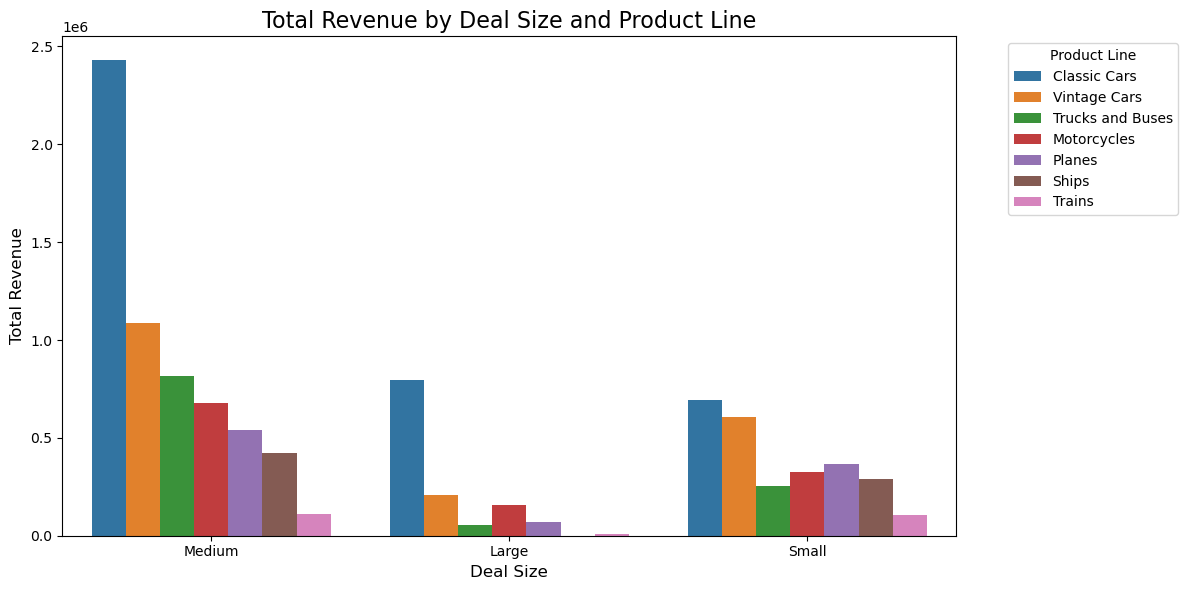

In [46]:
## plot
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_deal_size,x='DEALSIZE',y='Total Revenue',hue='PRODUCTLINE',palette='tab10')

## Add labels and titles
plt.title('Total Revenue by Deal Size and Product Line', fontsize=16)
plt.xlabel('Deal Size', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [47]:
#Q4. what is the average order value?

In [48]:
## AOV = (Total Revenue)/(Total Number of Orders)

## Total Revenue
total_revenue = data['SALES'].sum()

## Total Number of Orders
total_orders = data['ORDERNUMBER'].nunique()
 
## Average
average_order_value = total_revenue/total_orders

print(f"\033[1mTotal Revenue:\033[0m] {total_revenue:,.2f}")
print(f"\033[1mTotal Number of Orders:\033[0m {total_orders}")
print(f"\033[1mAverage Order Value:\033[0m {average_order_value:,.2f}")

Total Revenue:] 10,032,628.85
Total Number of Orders: 307
Average Order Value: 32,679.57


In [49]:
##Customer Behavior

In [50]:
#Q1. who are top customers by revenue?

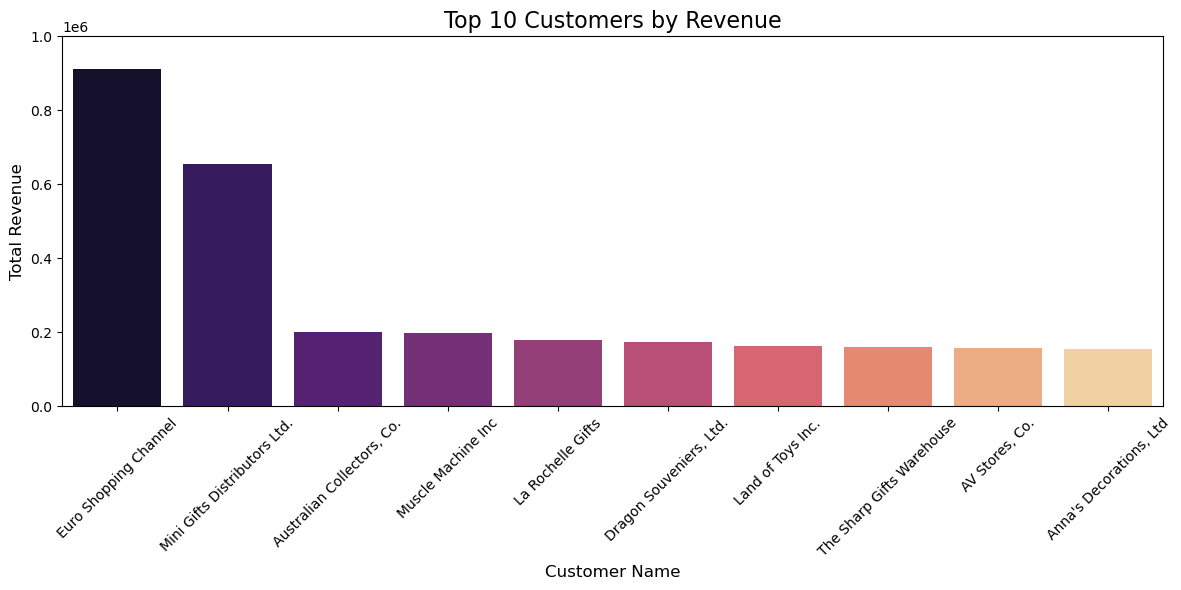

In [51]:
top_customers_by_revenue = data.groupby('CUSTOMERNAME')['SALES'].sum().reset_index().sort_values(by = 'SALES',ascending = False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data =top_customers_by_revenue, x = 'CUSTOMERNAME', y= 'SALES', palette = 'magma')

## Add titles and labels
plt.title('Top 10 Customers by Revenue', fontsize =16)
plt.xlabel('Customer Name', fontsize = 12)
plt.ylabel('Total Revenue', fontsize = 12)
plt.xticks(rotation =45)
plt.yticks(range(0,1000001,200000))

plt.tight_layout()
plt.show()


In [52]:
#Contribution of top 10 customers to Total Revenue

In [53]:
Total = top_customers_by_revenue['SALES'].sum()

contribution_of_top_customers = (Total/total_sales)*100

print(f'Contribution of Top 10 Customers: {contribution_of_top_customers}')

Contribution of Top 10 Customers: 29.452726640037124


In [54]:
#Q2. To identify the most frequent order combinations and how frequently do customers place orders?

In [55]:
## Frequent orders by grouping and counting unique ordernumbers
frequent_orders = data.groupby(['CUSTOMERNAME','COUNTRY','PRODUCTLINE','DEALSIZE'])['ORDERNUMBER'].nunique().reset_index().sort_values(by='ORDERNUMBER', ascending = False).head(20)

## renaming for clarity
frequent_orders.rename(columns = {'ORDERNUMBER':'UNIQUE ORDERS'}, inplace =True)

frequent_orders

,CUSTOMERNAME,COUNTRY,PRODUCTLINE,DEALSIZE,UNIQUE ORDERS
268,Euro Shopping Channel,Spain,Classic Cars,Medium,16
269,Euro Shopping Channel,Spain,Classic Cars,Small,15
284,Euro Shopping Channel,Spain,Vintage Cars,Small,12
467,Mini Gifts Distributors Ltd.,USA,Classic Cars,Medium,12
478,Mini Gifts Distributors Ltd.,USA,Vintage Cars,Medium,10
283,Euro Shopping Channel,Spain,Vintage Cars,Medium,10
468,Mini Gifts Distributors Ltd.,USA,Classic Cars,Small,10
479,Mini Gifts Distributors Ltd.,USA,Vintage Cars,Small,10
475,Mini Gifts Distributors Ltd.,USA,Trucks and Buses,Medium,9
281,Euro Shopping Channel,Spain,Trucks and Buses,Small,8


In [56]:
##Geographical Analysis

In [57]:
#Sales by country and product line

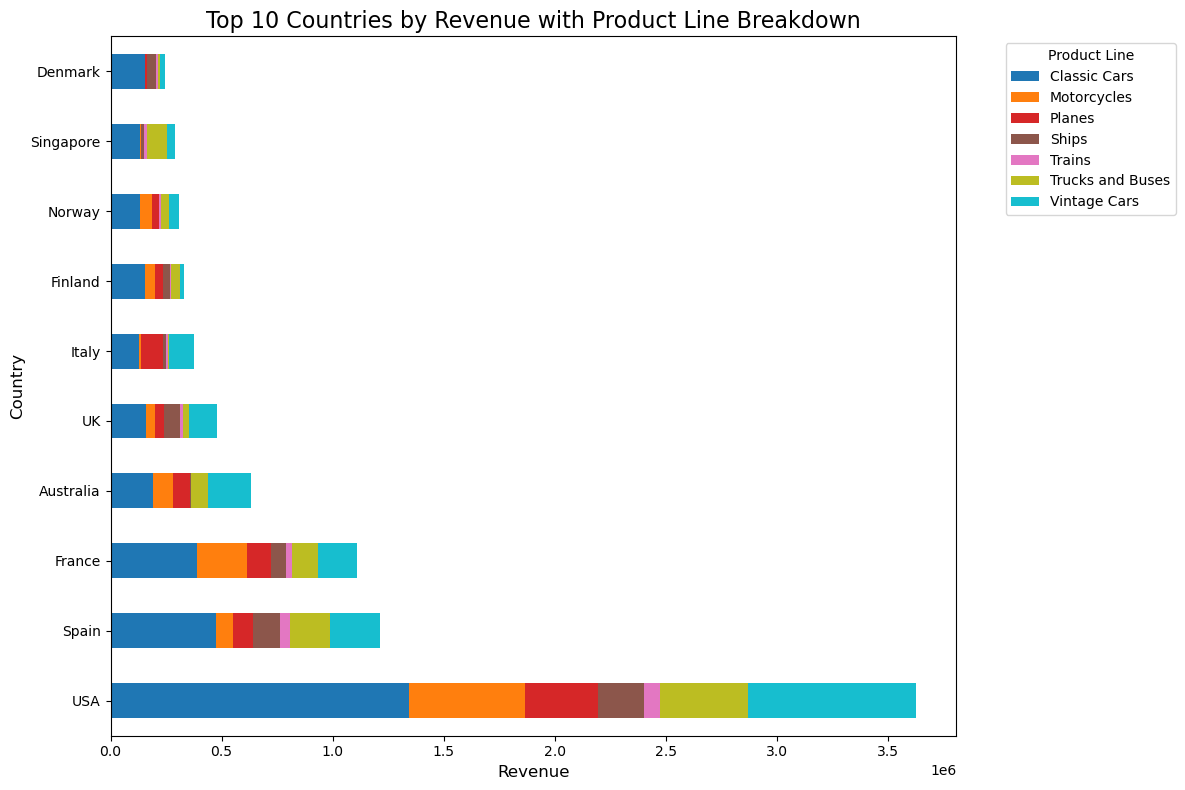

In [58]:
#  Calculate total revenue by country and filter top 10
top_countries = (
    data.groupby('COUNTRY')['SALES']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# calculate sales by product line of top countries
top_countries_data = data[data['COUNTRY'].isin(top_countries)]
sales_by_country_productline = (
    top_countries_data.groupby(['COUNTRY', 'PRODUCTLINE'])['SALES']
    .sum()
    .reset_index()
)

# Create pivot table for stacked bar chart
pivot_data = sales_by_country_productline.pivot(
    index='COUNTRY', columns='PRODUCTLINE', values='SALES'
).fillna(0)

pivot_data['Total Revenue'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values(by='Total Revenue', ascending=False).drop(columns='Total Revenue')

# Plot stacked horizontal bar chart
pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    colormap='tab10'
)

# Add titles and labels
plt.title('Top 10 Countries by Revenue with Product Line Breakdown', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [59]:
##Product Demand

In [60]:
#Q1. which products are the most popular based on sales volume?

In [61]:
## Top 10 popular products based on quantity ordered 
popular_products_by_volume = data.groupby(['PRODUCTCODE','PRODUCTLINE'])['QUANTITYORDERED'].sum().reset_index().sort_values(by='QUANTITYORDERED', ascending =False).head(10)

popular_products_by_volume

,PRODUCTCODE,PRODUCTLINE,QUANTITYORDERED
39,S18_3232,Classic Cars,1774
76,S24_3856,Classic Cars,1052
50,S18_4600,Trucks and Buses,1031
106,S700_4002,Planes,1029
14,S12_4473,Trucks and Buses,1024
77,S24_3949,Planes,1008
91,S50_1341,Vintage Cars,999
16,S18_1097,Trucks and Buses,999
29,S18_2432,Trucks and Buses,998
18,S18_1342,Vintage Cars,997


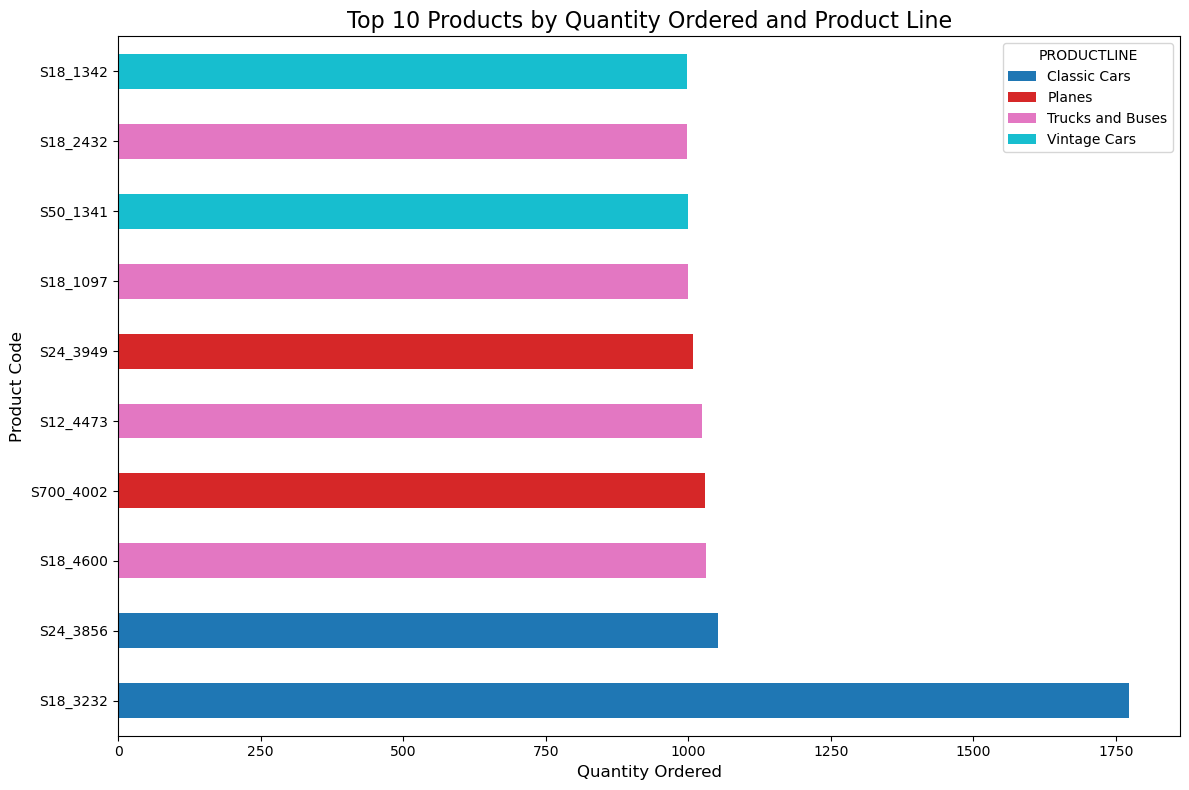

In [62]:
## pivot table for stacked bar chart
pivot_data = popular_products_by_volume.pivot(
    index='PRODUCTCODE', columns='PRODUCTLINE', values='QUANTITYORDERED'
).fillna(0)

pivot_data['Total Orders'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values(by='Total Orders', ascending=False).drop(columns='Total Orders')

# Plot stacked horizontal bar chart
pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    colormap='tab10')

## Add Titles and labels
plt.title('Top 10 Products by Quantity Ordered and Product Line', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Product Code', fontsize=12)

plt.tight_layout()
plt.show()

In [63]:
#Product demand during specific months

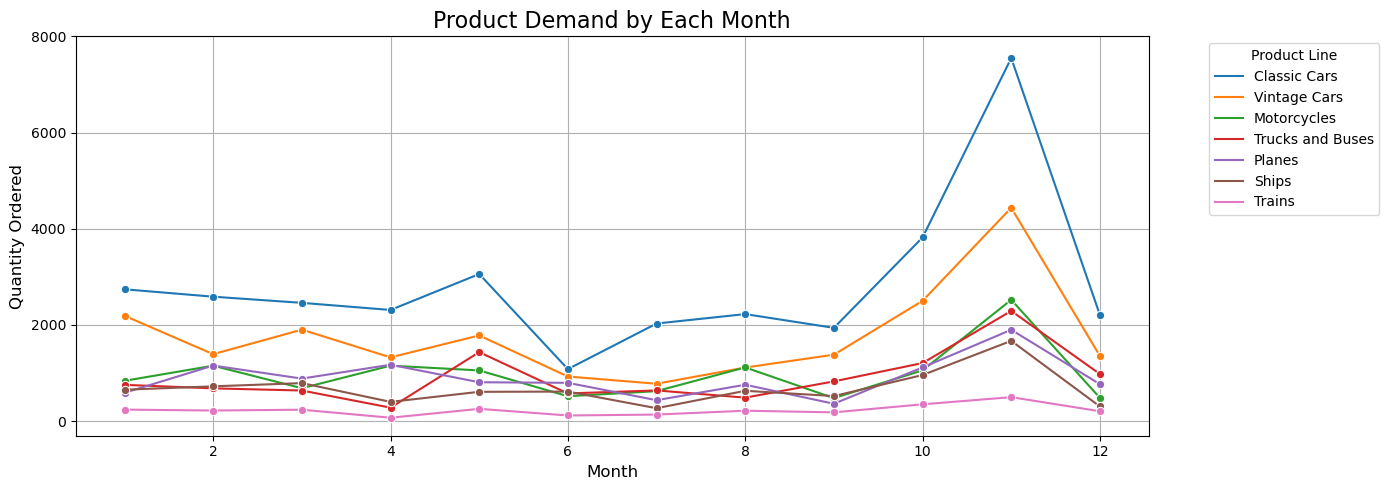

In [65]:
## Product Demand by each month by grouping Month_id and Product line together and summing quantity ordered 
product_demand_by_each_month = data.groupby(['MONTH_ID','PRODUCTLINE'])['QUANTITYORDERED'].sum().reset_index().sort_values(by = 'QUANTITYORDERED', ascending = False)

## Plot barplot
plt.figure(figsize = (14,5))
sns.lineplot(product_demand_by_each_month, x = "MONTH_ID", y = 'QUANTITYORDERED', hue = 'PRODUCTLINE', marker = 'o')

# Add titles and labels
plt.title('Product Demand by Each Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks(range(0,8001,2000))

plt.grid()
plt.tight_layout()
plt.show()

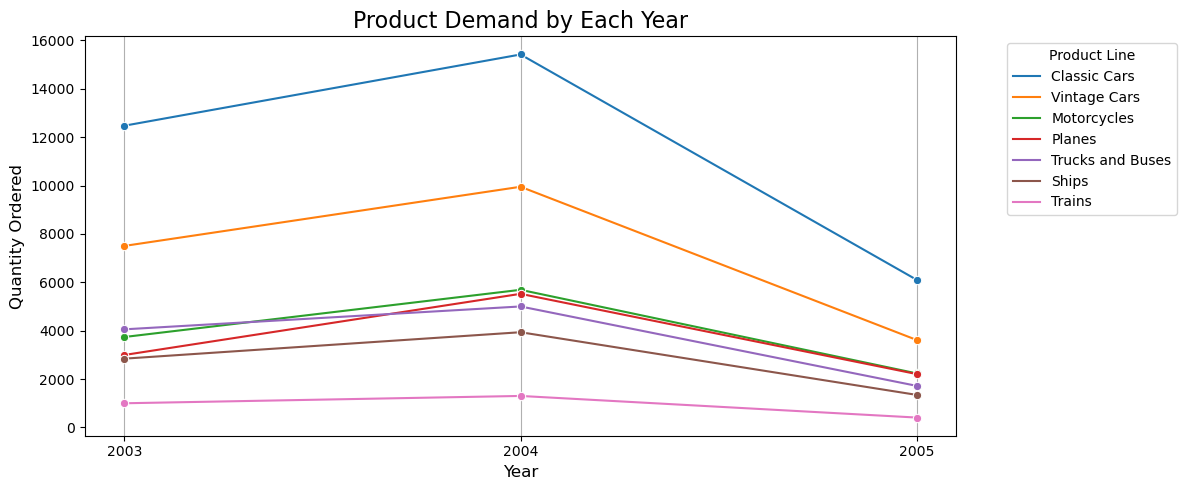

In [66]:
## Product Demand by each Year by grouping Month_id and Product line together and summing quantity ordered 
product_demand_by_each_year = data.groupby(['YEAR_ID','PRODUCTLINE'])['QUANTITYORDERED'].sum().reset_index().sort_values(by = 'QUANTITYORDERED', ascending = False)

## Plot barplot
plt.figure(figsize = (12,5))
sns.lineplot(product_demand_by_each_year, x = "YEAR_ID", y = 'QUANTITYORDERED', hue = 'PRODUCTLINE', marker='o')

# Add titles and labels
plt.title('Product Demand by Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(2003,2006,1))

plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

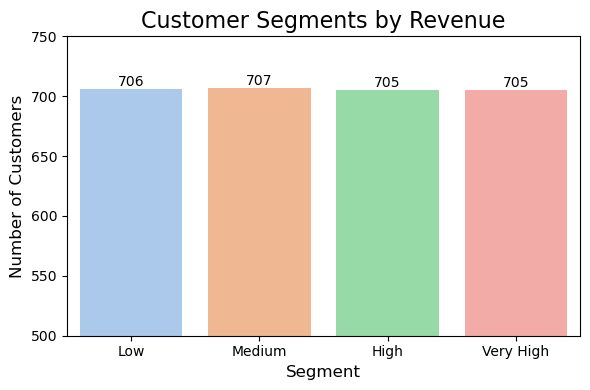

In [67]:
# Segment customers based on revenue
data['Customer Segment'] = pd.qcut(data['SALES'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

## count of each segment
segment_counts = data['Customer Segment'].value_counts()

# Plot
plt.figure(figsize=(6,4))
ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='pastel')

## Add Data labels
for i in ax.containers:
    ax.bar_label(i)
    
## Add titles and labels
plt.title('Customer Segments by Revenue', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.ylim(500,750)

plt.tight_layout()
plt.show()

Key Insights:
    
1.December shows a significant spike in sales, indicating strong seasonal demand.
2.Sales peaked in Q4, suggesting a high demand during the final quarter of the year.
3.The 'Classic Cars' product line generated the highest revenue, contributing 39% of total sales.
4.'Trains' are among the lowest-performing product lines in terms of sales.
5.Medium deal sizes contribute more revenue for 'Classic Cars' than any other product line.
6.Medium-sized products are the most popular across all product lines.
7.The top 10 customers accounted for approximately 30% of total revenue.
8.Most of the top customers are from the 'Classic Cars' product line.
9.The Euro Shopping Channel has the most frequent orders, indicating high customer loyalty.
10.The 'Classic Cars' product line is associated with frequent orders, especially in Spain.
11.The USA generates the most revenue, with 'Classic Cars' being the top-selling product.
12.Classic Cars show consistent demand across all years.
 